# Make probability map

In [1]:
import arcpy
import os
import rasterio as rio
from osgeo import gdal
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import seaborn as sns
import geopandas
import matplotlib.pyplot as plt
import rasterio
import rasterio.plot
import matplotlib.colors as colors

In [2]:
path='E:\program'
os.chdir(path)

In [14]:
file_path=r'mmr_landuse_2016_final.tif'
with rio.open(file_path) as dem_src:
    luc_mmr = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotrans = luc.GetGeoTransform()
    
base_case_lu_raster=[]
for y in range(506):
    b= []
    for x in range(398):
        b.append([0,0])
    base_case_lu_raster.append(b)
    
lu_folder=r'Monte_carlo Probability maps\base_case'
for file in os.listdir(lu_folder):
    file_path=os.path.join(lu_folder,file)
    print(file_path)
    with rio.open(file_path) as dem_src:
        luc_mmr = dem_src.read(1)
        luc=gdal.Open(file_path)
        projection = luc.GetProjection()
        geotransform = luc.GetGeoTransform()  
                        
        if file=='Probability of Industry.tif':
            for i in range(len(luc_mmr)):
                for j in range(len(luc_mmr[1])):
                    if luc_mmr[i][j]>0.2:
                        base_case_lu_raster[i][j][0]=3
                        base_case_lu_raster[i][j][1]=luc_mmr[i][j]
                        
        if file=='Probability of Urban-formal.tif':
            for i in range(len(luc_mmr)):
                for j in range(len(luc_mmr[1])):
                    if luc_mmr[i][j]>0.2:
                        if luc_mmr[i][j]>base_case_lu_raster[i][j][1]:
                            base_case_lu_raster[i][j][0]=6
                            base_case_lu_raster[i][j][1]=luc_mmr[i][j]
                        
        if file=='Probability of Urban-informal.tif':
            for i in range(len(luc_mmr)):
                for j in range(len(luc_mmr[1])):
                    if luc_mmr[i][j]>0.2:
                        if luc_mmr[i][j]>base_case_lu_raster[i][j][1]:
                            base_case_lu_raster[i][j][0]=7
                            base_case_lu_raster[i][j][1]=luc_mmr[i][j]
                        
        if file=='Probability of Urban-villages.tif':
            for i in range(len(luc_mmr)):
                for j in range(len(luc_mmr[1])):
                    if luc_mmr[i][j]>0.2:
                        if luc_mmr[i][j]>base_case_lu_raster[i][j][1]:
                            base_case_lu_raster[i][j][0]=8
                            base_case_lu_raster[i][j][1]=luc_mmr[i][j]
                        
        if file=='Probability of Agriculture.tif':
            for i in range(len(luc_mmr)):
                for j in range(len(luc_mmr[1])):
                    if base_case_lu_raster[i][j][0]==0:
                        if luc_mmr[i][j]>0.2:
                            base_case_lu_raster[i][j][0]=1
                        
        if file=='Probability of Forest.tif':
            for i in range(len(luc_mmr)):
                for j in range(len(luc_mmr[1])):
                    if base_case_lu_raster[i][j][0]==0:
                        if luc_mmr[i][j]>0.2:
                            base_case_lu_raster[i][j][0]=2
                            
        if file=='Probability of Nature.tif':
            for i in range(len(luc_mmr)):
                for j in range(len(luc_mmr[1])):
                    if base_case_lu_raster[i][j][0]==0:
                        if luc_mmr[i][j]>0.2:
                            base_case_lu_raster[i][j][0]=4  
                            
        if file=='Probability of Recreation.tif':
            for i in range(len(luc_mmr)):
                for j in range(len(luc_mmr[1])):        
                    if base_case_lu_raster[i][j][0]==0:
                        if luc_mmr[i][j]>0.2:
                            base_case_lu_raster[i][j][0]=5

Monte_carlo Probability maps\base_case\Probability of Agriculture.tif
Monte_carlo Probability maps\base_case\Probability of Forest.tif
Monte_carlo Probability maps\base_case\Probability of Industry.tif
Monte_carlo Probability maps\base_case\Probability of Nature.tif
Monte_carlo Probability maps\base_case\Probability of Recreation.tif
Monte_carlo Probability maps\base_case\Probability of Urban-formal.tif
Monte_carlo Probability maps\base_case\Probability of Urban-informal.tif
Monte_carlo Probability maps\base_case\Probability of Urban-villages.tif


In [15]:
base_case_lu_raster_final=[]
for y in range(506):
    b= []
    for x in range(398):
        b.append(base_case_lu_raster[y][x][0])
    base_case_lu_raster_final.append(b)

In [16]:
file_path=r'mmr_landuse_2016_final.tif'
with rio.open(file_path) as dem_src:
    luc_mmr = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotrans = luc.GetGeoTransform()

In [17]:
for i in range(len(luc_mmr)):
    for j in range(len(luc_mmr[1])):  
        if luc_mmr[i][j]==8:
            base_case_lu_raster_final[i][j]=9
        if luc_mmr[i][j]==9:
            base_case_lu_raster_final[i][j]=10
        if luc_mmr[i][j]==10:
            base_case_lu_raster_final[i][j]=11
        if luc_mmr[i][j]==11:
            base_case_lu_raster_final[i][j]=12

In [18]:
for i in range(len(base_case_lu_raster_final)):
    for j in range(len(base_case_lu_raster_final[1])):  
        if base_case_lu_raster_final[i][j]==1:
            base_case_lu_raster_final[i][j]=0
        if base_case_lu_raster_final[i][j]==2:
            base_case_lu_raster_final[i][j]=1
        if base_case_lu_raster_final[i][j]==3:
            base_case_lu_raster_final[i][j]=2
        if base_case_lu_raster_final[i][j]==4:
            base_case_lu_raster_final[i][j]=3
        if base_case_lu_raster_final[i][j]==5:
            base_case_lu_raster_final[i][j]=4
        if base_case_lu_raster_final[i][j]==6:
            base_case_lu_raster_final[i][j]=5
        if base_case_lu_raster_final[i][j]==7:
            base_case_lu_raster_final[i][j]=6
        if base_case_lu_raster_final[i][j]==8:
            base_case_lu_raster_final[i][j]=7
        if base_case_lu_raster_final[i][j]==9:
            base_case_lu_raster_final[i][j]=8
        if base_case_lu_raster_final[i][j]==10:
            base_case_lu_raster_final[i][j]=9
        if base_case_lu_raster_final[i][j]==11:
            base_case_lu_raster_final[i][j]=10
        if base_case_lu_raster_final[i][j]==12:
            base_case_lu_raster_final[i][j]=11

In [25]:
base_case_lu_raster_final=np.array(base_case_lu_raster_final)
outputPath = os.path.join('base_case_raster_2.tif')
cv2.imwrite(outputPath, base_case_lu_raster_final)
dataset2 = gdal.Open(outputPath, gdal.GA_Update)
dataset2.SetGeoTransform(geotrans)
dataset2.SetProjection(projection)

0

<AxesSubplot:title={'center':'Expected Annual damage'}>

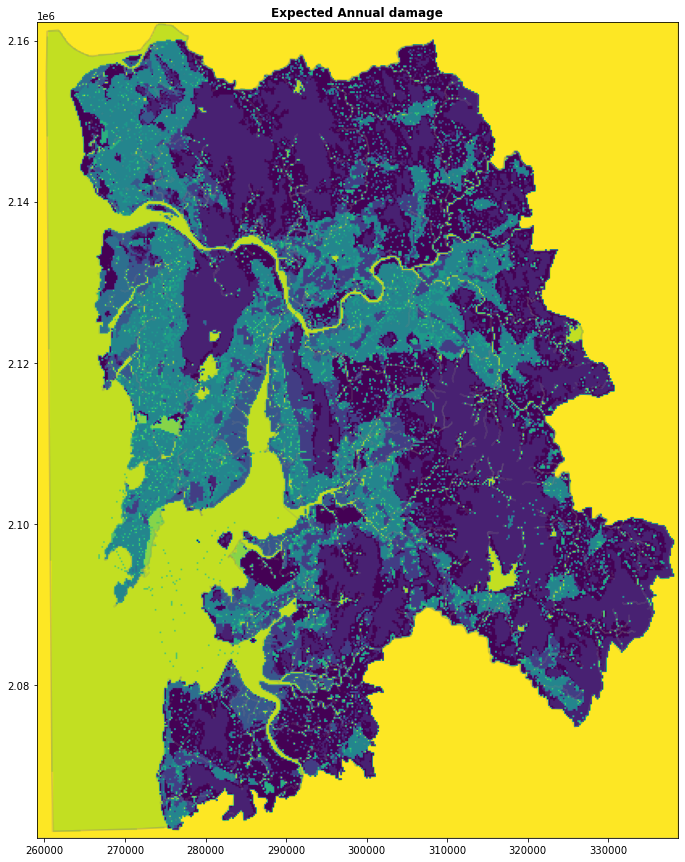

In [26]:
shapefile = geopandas.read_file('mmr_land_use_frame3.shp')
raster = rasterio.open(r"base_case_raster_2.tif")
fig, ax = plt.subplots(figsize=(15, 15))
rasterio.plot.show(raster, ax=ax,cmap="viridis",title='Expected Annual damage')
shapefile.plot(ax=ax, facecolor='none', edgecolor='grey', alpha=0.2)
#plot = ax.pcolor(raster_path)
#cbar=plt.colorbar(plot,ax=ax)
#cbar.set_label('Euro (2015)/cell')

In [ ]:
        if file=='Probability of Industry.tif':
            for i in range(len(luc_mmr)):
                for j in range(len(luc_mmr[1])):
                    if luc_mmr[i][j]>0.2:
                        base_case_lu_raster[i][j]=1
        if file=='Probability of Industry.tif':
            for i in range(len(luc_mmr)):
                for j in range(len(luc_mmr[1])):
                    if luc_mmr[i][j]>0.2:
                        base_case_lu_raster[i][j]=1
        if file=='Probability of Industry.tif':
            for i in range(len(luc_mmr)):
                for j in range(len(luc_mmr[1])):
                    if luc_mmr[i][j]>0.2:
                        base_case_lu_raster[i][j]=1

        if file=='Probability of Industry.tif':
            for i in range(len(luc_mmr)):
                for j in range(len(luc_mmr[1])):
                    if luc_mmr[i][j]>0.2:
                        base_case_lu_raster[i][j]=1